In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression




# Step 2

In [13]:
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train-test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# %% [markdown]
# ## 2. Logistic Regression (scikit-learn)
# %%
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score,
                           recall_score, f1_score, confusion_matrix)


Training samples: 120, Test samples: 30


# Initialize and train

In [17]:
logreg = LogisticRegression(
    penalty='l2',    # Regularization type
    C=1.0,          # Inverse regularization strength
    max_iter=1000,   # Maximum iterations
    random_state=42
)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)



# Evaluation

In [18]:

# Define the print_metrics function with multiclass support
def print_metrics(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

In [19]:


# Example usage with Logistic Regression

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print performance metrics
print("Logistic Regression Performance:")
print_metrics(y_test, y_pred)

Logistic Regression Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#  Neural Network (PyTorch)

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors

In [30]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Targets must be integers
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training


In [31]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define a simple neural network

In [33]:

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input layer
        self.relu = nn.ReLU()  # Activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Output layer

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


# Initialize the model

In [34]:
input_size = X_train.shape[1]  # Number of features (4 for Iris dataset)
hidden_size = 16  # Number of neurons in the hidden layer
num_classes = len(set(y_train))  # Number of classes (3 for Iris dataset)
model = SimpleNN(input_size, hidden_size, num_classes)


# Define loss function and optimizer


In [35]:
criterion = nn.CrossEntropyLoss()  # Suitable for multiclass classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop

In [36]:
for epoch in range(50):
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.3454
Epoch 20, Loss: 0.2701
Epoch 30, Loss: 0.0818
Epoch 40, Loss: 0.1199
Epoch 50, Loss: 0.0299


In [37]:
model.eval()
all_preds = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())

print("\nNeural Network Performance:")
print_metrics(y_test, all_preds)


Neural Network Performance:
Accuracy: 0.8667
Precision: 0.8683
Recall: 0.8667
F1 Score: 0.8614
Confusion Matrix:
[[10  0  0]
 [ 2  6  1]
 [ 0  1 10]]


In [39]:
# Evaluate the model on the test set
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Get predicted class indices
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f"Test Accuracy: {accuracy:.4f}")

# Example: Mapping results to class labels
class_names = ['setosa', 'versicolor', 'virginica']  # Class names for the Iris dataset
predictions = [class_names[pred] for pred in predicted.numpy()]  # Map predictions to class names
actuals = [class_names[label] for label in y_test_tensor.numpy()]  # Map actual labels to class names

# Print a few results
print("\nSample Predictions:")
for i in range(10):  # Displaying first 10 predictions
    print(f"Predicted: {predictions[i]}, Actual: {actuals[i]}")

Test Accuracy: 0.9667

Sample Predictions:
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: virginica, Actual: versicolor
Predicted: versicolor, Actual: versicolor


# 1. Analyze Metrics in Class-Imbalanced Scenarios

In [40]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data.target_names[0]  # Let's assume 'setosa' is the majority class
minority_classes = data.target_names[1:]  # 'versicolor' and 'virginica'

# Create an imbalanced dataset by undersampling one class
X_majority = X[y == 0]  # Majority class samples
y_majority = y[y == 0]

X_minority = X[y != 0]  # Minority class samples
y_minority = y[y != 0]

# Downsample the minority class to create imbalance
X_minority_downsampled, y_minority_downsampled = resample(
    X_minority, y_minority, replace=False, n_samples=int(len(X_minority) * 0.2), random_state=42
)

# Combine majority and downsampled minority
X_imbalanced = np.vstack((X_majority, X_minority_downsampled))
y_imbalanced = np.hstack((y_majority, y_minority_downsampled))

# Train-test split for the imbalanced dataset
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_imb_scaled = scaler.fit_transform(X_train_imb)
X_test_imb_scaled = scaler.transform(X_test_imb)

print(f"Training samples: {len(y_train_imb)}, Test samples: {len(y_test_imb)}")

Training samples: 56, Test samples: 14


#                               Bones Task!

## 1. Code: Train and Evaluate Models on Imbalanced Data
### Scikit-Learn Logistic Regression:

In [45]:
# Train Logistic Regression on imbalanced data
logreg_imb = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
logreg_imb.fit(X_train_imb_scaled, y_train_imb)
y_pred_logreg_imb = logreg_imb.predict(X_test_imb_scaled)

print("Logistic Regression on Imbalanced Data:")
print_metrics(y_test_imb, y_pred_logreg_imb)

Logistic Regression on Imbalanced Data:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0  1  0]
 [ 0  0  1]]


### PyTorch Neural Network:

In [46]:
# Convert imbalanced data to PyTorch tensors
X_train_imb_tensor = torch.tensor(X_train_imb_scaled, dtype=torch.float32)
X_test_imb_tensor = torch.tensor(X_test_imb_scaled, dtype=torch.float32)
y_train_imb_tensor = torch.tensor(y_train_imb, dtype=torch.long)
y_test_imb_tensor = torch.tensor(y_test_imb, dtype=torch.long)

# Create DataLoader for imbalanced training data
train_dataset_imb = TensorDataset(X_train_imb_tensor, y_train_imb_tensor)
train_loader_imb = DataLoader(train_dataset_imb, batch_size=16, shuffle=True)

# Create DataLoader for imbalanced test data (FIXED)
test_dataset_imb = TensorDataset(X_test_imb_tensor, y_test_imb_tensor)
test_loader_imb = DataLoader(test_dataset_imb, batch_size=16, shuffle=False)  # Shuffle is False for testing

# Train the neural network on imbalanced data
model_imb = SimpleNN(input_size, hidden_size, num_classes)
criterion_imb = nn.CrossEntropyLoss()
optimizer_imb = optim.Adam(model_imb.parameters(), lr=0.01)

for epoch in range(50):
    for inputs, labels in train_loader_imb:
        optimizer_imb.zero_grad()
        outputs = model_imb(inputs)
        loss = criterion_imb(outputs, labels)
        loss.backward()
        optimizer_imb.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Evaluate the neural network on imbalanced data
model_imb.eval()
all_preds_imb = []
with torch.no_grad():
    for inputs, labels in test_loader_imb:  # Now test_loader_imb is defined
        outputs = model_imb(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds_imb.extend(preds.numpy())

print("\nNeural Network on Imbalanced Data:")
print_metrics(y_test_imb, all_preds_imb)

Epoch 10, Loss: 0.1416
Epoch 20, Loss: 0.2250
Epoch 30, Loss: 0.0119
Epoch 40, Loss: 0.0607
Epoch 50, Loss: 0.0653

Neural Network on Imbalanced Data:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0  1  0]
 [ 0  0  1]]


## Visualization

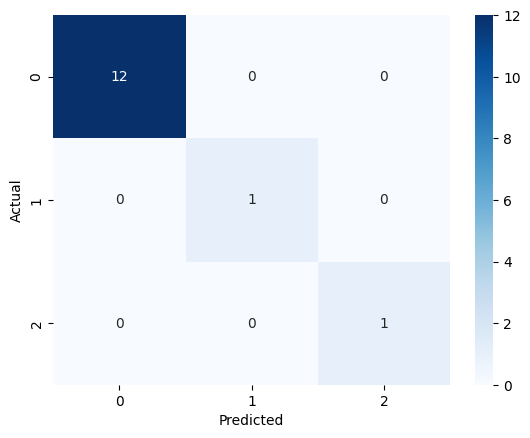

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_imb, all_preds_imb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Train with Different C Values in Scikit-Learn


### Code: Train Logistic Regression with Different C Values


In [49]:
C_values = [1, 0.5, 3, 10]

for C in C_values:
    logreg_c = LogisticRegression(C=C, max_iter=1000, random_state=42)
    logreg_c.fit(X_train_scaled, y_train)
    y_pred_c = logreg_c.predict(X_test_scaled)
    
    print(f"\nResults for C = {C}:")
    print_metrics(y_test, y_pred_c)


Results for C = 1:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Results for C = 0.5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Results for C = 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Results for C = 10:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
